# Home Credit Default Risk Kaggle Competition

Retrieving data. Initially we are considering features in application_train.csv file to train the model

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
#Loading training and test data sets application_train.csv and application_test.csv into a pandas dataframe
df_app_train = pd.read_csv('application_train.csv')
df_app_test = pd.read_csv('application_test.csv')


In [206]:
print df_app_train.shape
print df_app_test.shape

(307511, 122)
(48744, 121)


In [207]:
df_app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


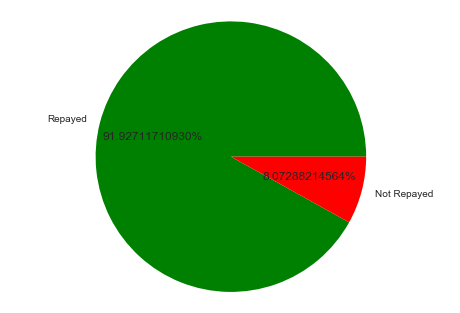

In [208]:
#Plotting percentage of 

fig, ax = plt.subplots(1, 1)
ax.pie(df_app_train.TARGET.value_counts(),autopct='%1.11f%%', labels=['Repayed','Not Repayed'], colors=['green','r'])
plt.axis('equal')
plt.ylabel('')
plt.show()



In [209]:
#Determining number of features of each data type and number of unique values for categorical features 

print "Number of features of each data type \n" 
print df_app_train.dtypes.value_counts()
print "Number of unique vlues for object data type \n" 
df_app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Number of features of each data type 

float64    65
int64      41
object     16
dtype: int64
Number of unique vlues for object data type 



NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [210]:
#Total number of NULL values for each feature.
df_app_train.isnull().sum().sort_values(ascending=False).head(35)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
FLOORSMIN_MEDI              208642
FLOORSMIN_MODE              208642
FLOORSMIN_AVG               208642
YEARS_BUILD_MEDI            204488
YEARS_BUILD_AVG             204488
YEARS_BUILD_MODE            204488
OWN_CAR_AGE                 202929
LANDAREA_MODE               182590
LANDAREA_AVG                182590
LANDAREA_MEDI               182590
BASEMENTAREA_MEDI           179943
BASEMENTAREA_AVG            179943
BASEMENTAREA_MODE           179943
EXT_SOURCE_1                173378
NONLIVINGAREA_MEDI          169682
NONLIVINGAREA_AVG           169682
NONLIVINGAREA_MODE          169682
ELEVATORS_MODE              163891
ELEVATORS_AVG       

In [211]:
#Determining which features have higher correlation to target variable

feature_corr = df_app_train.corr()['TARGET'].sort_values()

print "Top 25 positive correlations \n", format(feature_corr.tail(25)) 
print "Top 25 Negative correlations \n", format(feature_corr.head(25)) 

Top 25 positive correlations 
FLAG_DOCUMENT_21               0.003709
FLAG_DOCUMENT_2                0.005417
REG_REGION_NOT_LIVE_REGION     0.005576
REG_REGION_NOT_WORK_REGION     0.006942
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET    

In [212]:
###Variables selected by intuition
#NAME_CONTRACT_TYPE
#CODE_GENDER
#FLAG_OWN_CAR
#FLAG_OWN_REALTY
#AMT_INCOME_TOTAL
#AMT_ANNUITY
#NAME_TYPE_SUITE
#NAME_INCOME_TYPE
#NAME_EDUCATION_TYPE
#NAME_FAMILY_STATUS
#NAME_HOUSING_TYPE
#DAYS_ID_PUBLISH
#FLAG_MOBIL
#FLAG_CONT_MOBILE
#FLAG_EMAIL
#WEEKDAY_APPR_PROCESS_START
#LIVE_REGION_NOT_WORK_REGION
#ORGANIZATION_TYPE###



Analysing 50 features having higher correlation to TARGET variable and variables selected by intuition

In [213]:

#Create a data frame with categorical variables to visualize them
df_app_train_cat = df_app_train[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 
                                 'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                                      'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_CONT_MOBILE','FLAG_EMAIL','FLAG_EMP_PHONE',
                                 'FLAG_MOBIL','FLAG_WORK_PHONE', 'LIVE_CITY_NOT_WORK_CITY','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
                                 'REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                                 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2',
                                 'FLAG_DOCUMENT_21','FLAG_DOCUMENT_3','FLAG_DOCUMENT_6']]

In [214]:
df_app_train_cat.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6
0,100002,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0,0,0,0,2,2,0,0,1,0
1,100003,0,Cash loans,F,N,N,Family,State servant,Higher education,Married,...,0,0,0,0,1,1,0,0,1,0
2,100004,0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0,0,0,0,2,2,0,0,0,0
3,100006,0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,...,0,0,0,0,2,2,0,0,1,0
4,100007,0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0,1,0,0,2,2,0,0,0,0


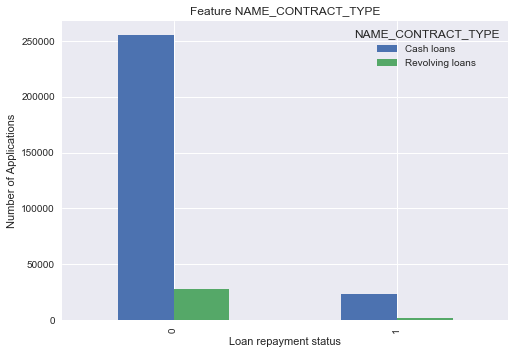

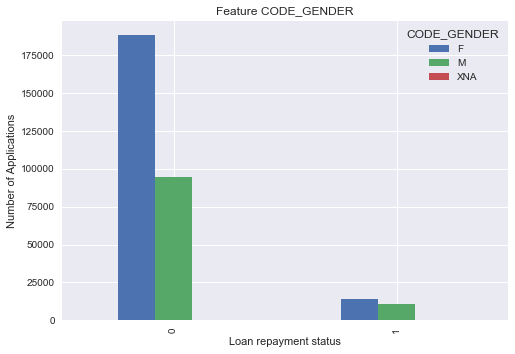

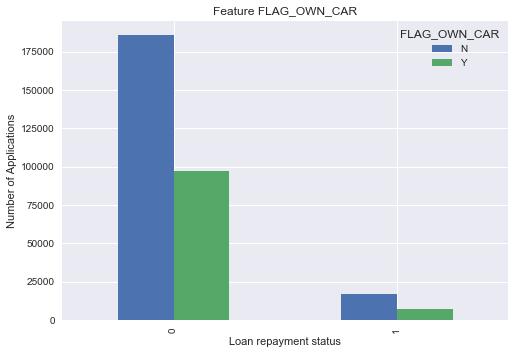

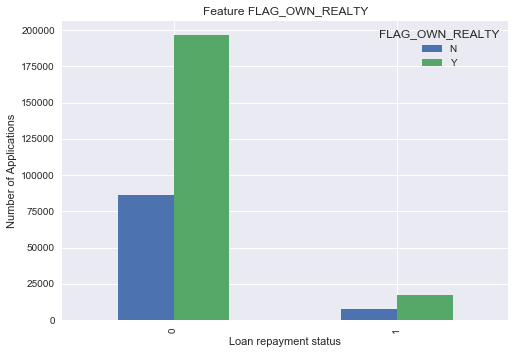

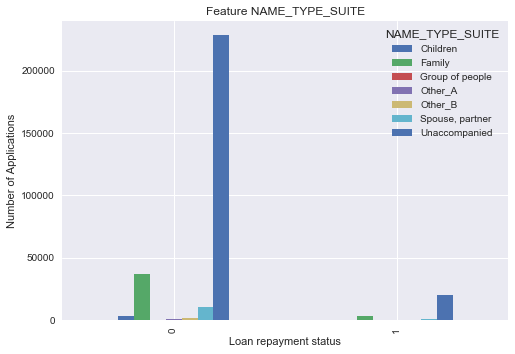

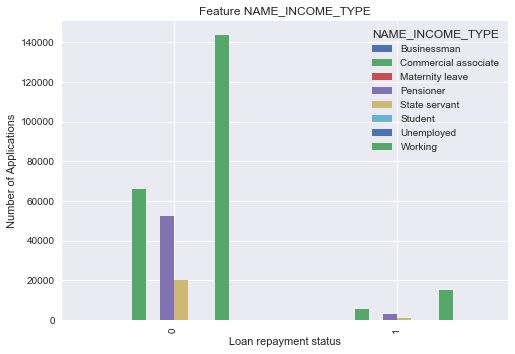

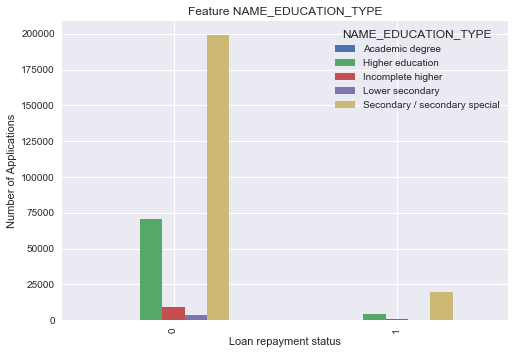

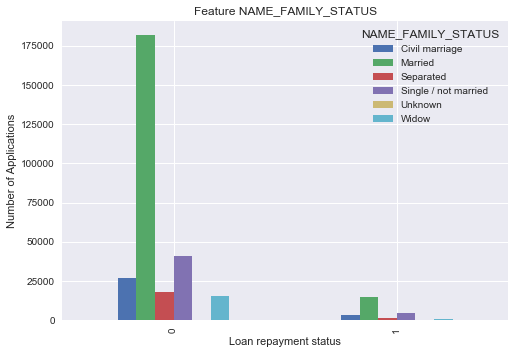

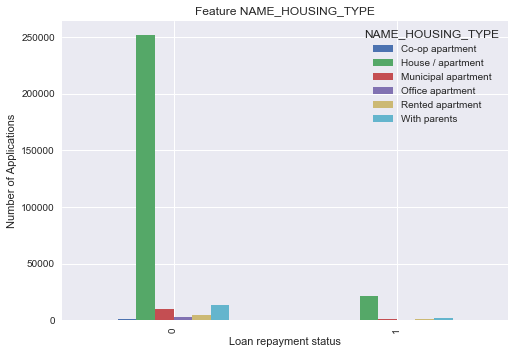

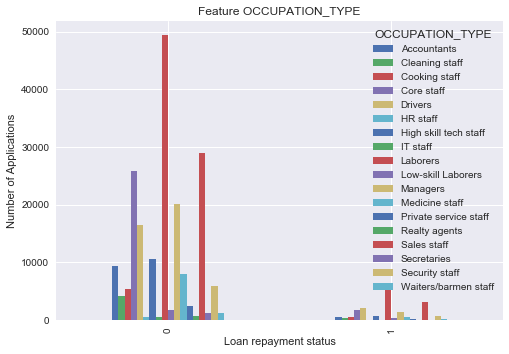

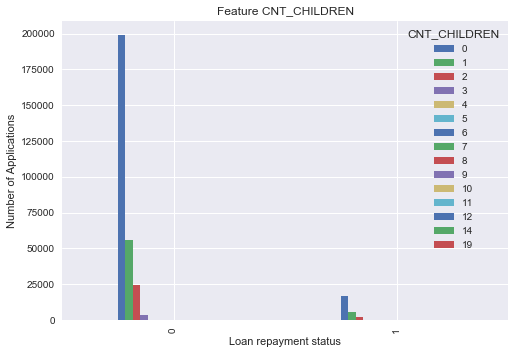

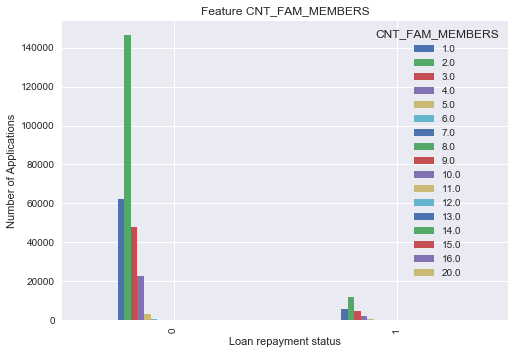

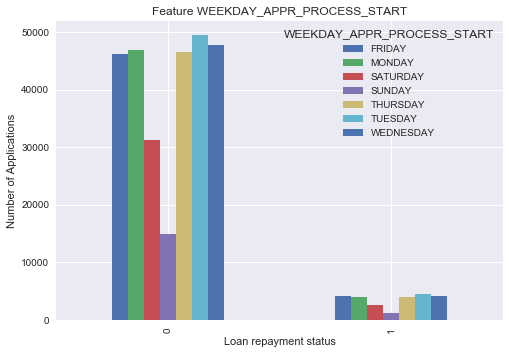

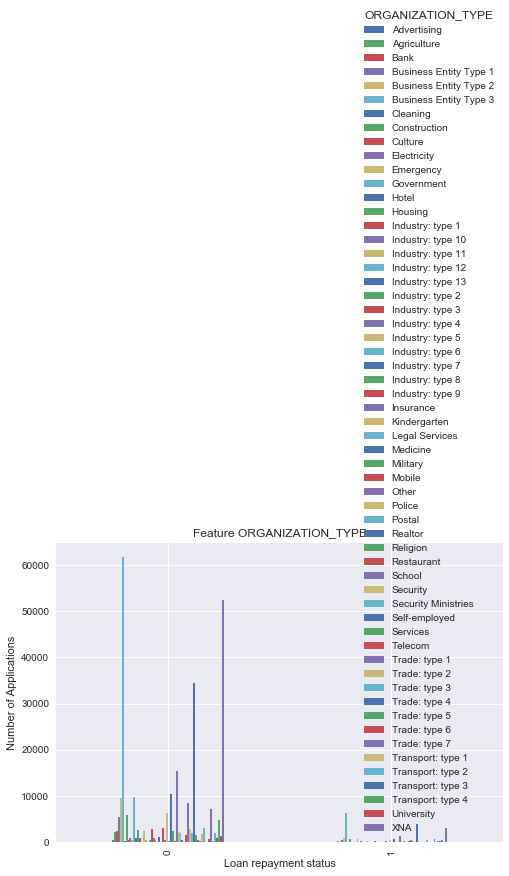

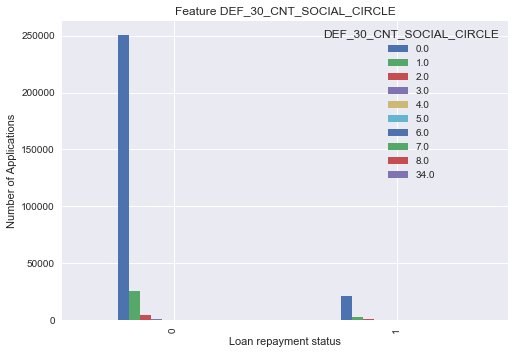

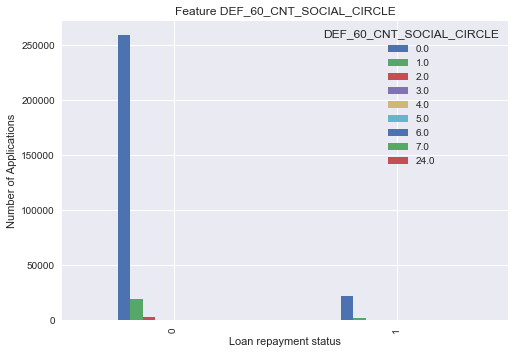

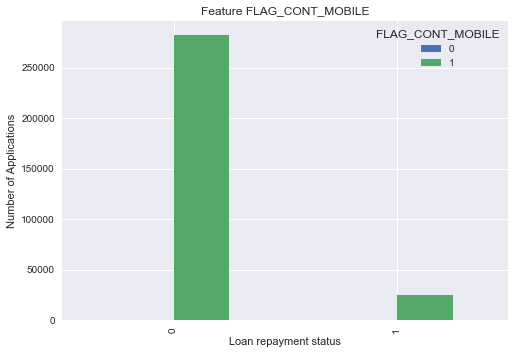

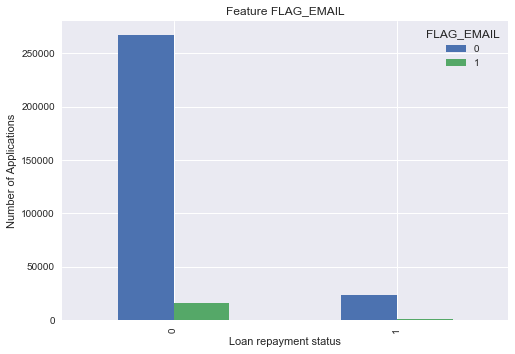

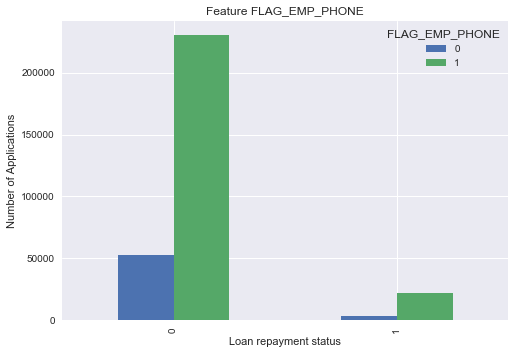

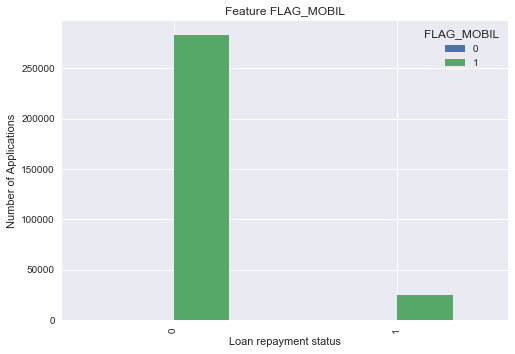

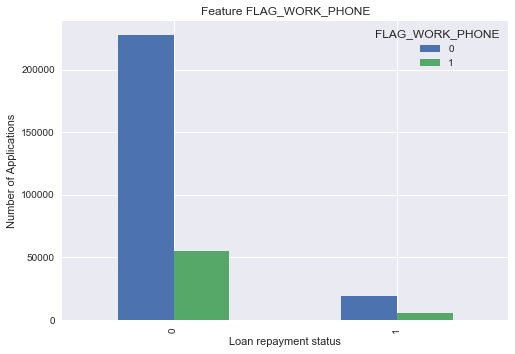

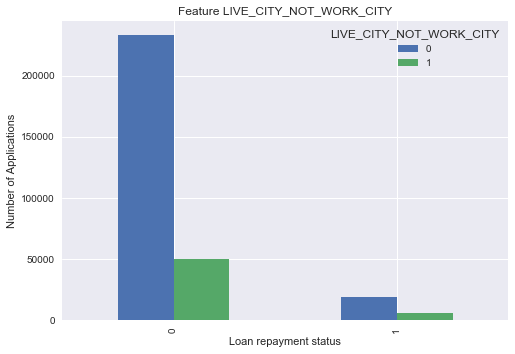

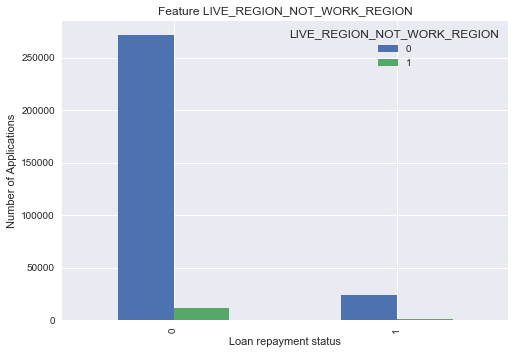

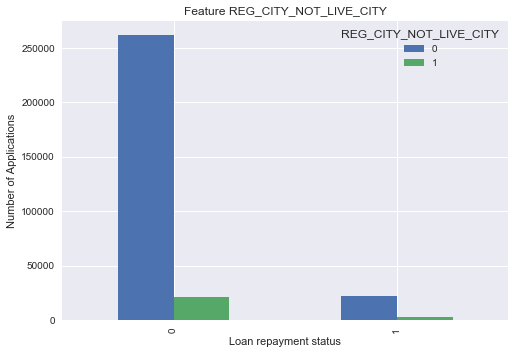

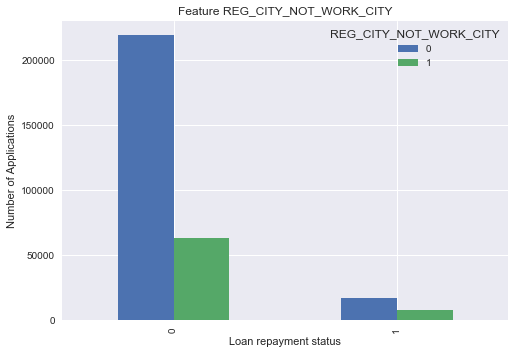

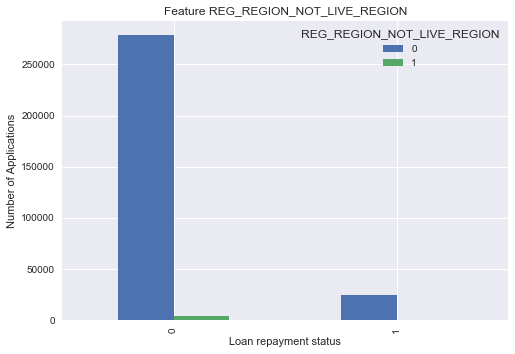

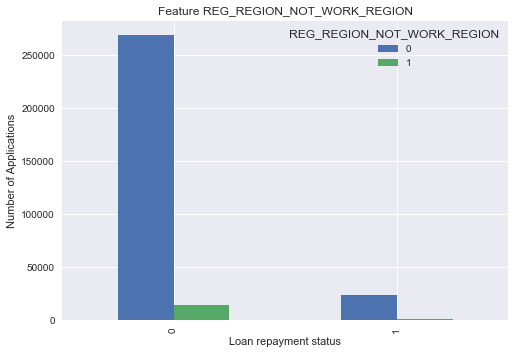

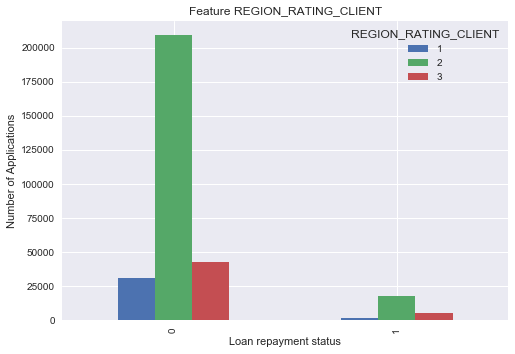

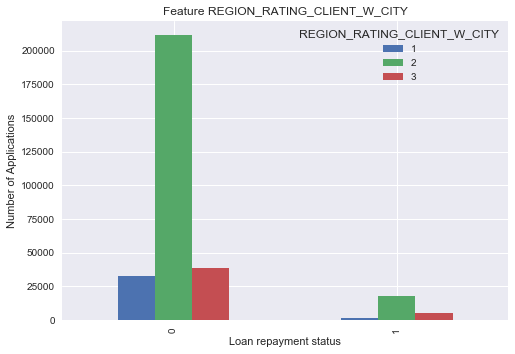

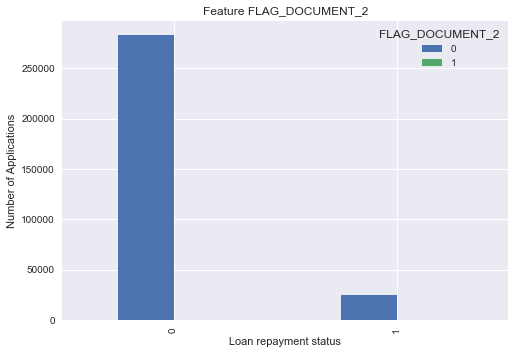

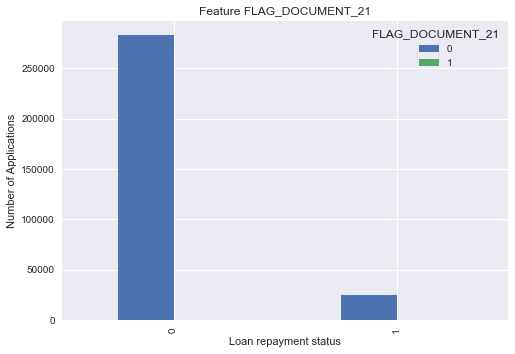

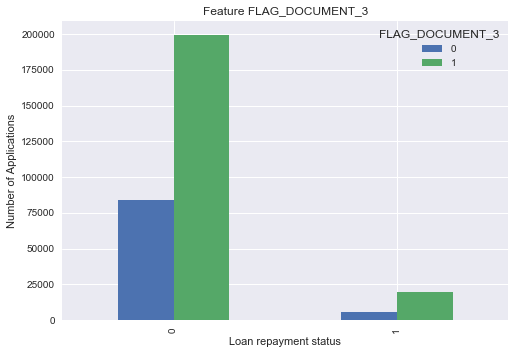

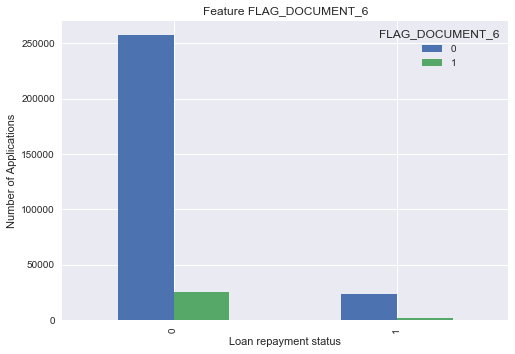

In [215]:
import matplotlib.gridspec as gridspec
for i,col in enumerate(df_app_train_cat[df_app_train_cat.iloc[:,2:35].columns]):
    table = pd.crosstab(df_app_train_cat['TARGET'], columns=[df_app_train_cat[col]])
    table.plot(kind="bar")
    plt.title("Feature " + str(col))
    plt.xlabel("Loan repayment status")
    plt.ylabel("Number of Applications")
    plt.show()

In [216]:
df_app_train_continous = df_app_train[['SK_ID_CURR','TARGET','AMT_CREDIT', 'AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE',
                                       'APARTMENTS_AVG', 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
                                       'DAYS_REGISTRATION', 'ELEVATORS_AVG','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                                     'FLOORSMAX_AVG','FLOORSMIN_AVG','LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG','OBS_30_CNT_SOCIAL_CIRCLE'
                                     ,'OBS_60_CNT_SOCIAL_CIRCLE','OWN_CAR_AGE','REGION_POPULATION_RELATIVE', 'TOTALAREA_MODE']]

In [217]:
df_app_train_continous.describe()

,SK_ID_CURR,TARGET,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,APARTMENTS_AVG,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,...,EXT_SOURCE_3,FLOORSMAX_AVG,FLOORSMIN_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,TOTALAREA_MODE
count,307511.000000,307511.000000,3.075110e+05,307499.000000,3.075110e+05,3.072330e+05,151450.00000,307511.000000,307511.000000,307511.000000,...,246546.000000,154491.000000,98869.000000,97312.000000,153161.000000,306490.000000,306490.000000,104582.000000,307511.000000,159080.000000
mean,278180.518577,0.080729,5.990260e+05,27108.573909,1.687979e+05,5.383962e+05,0.11744,-16036.995067,63815.045904,-2994.202373,...,0.510853,0.226282,0.231894,0.100775,0.107399,1.422245,1.405292,12.061091,0.020868,0.102547
std,102790.175348,0.272419,4.024908e+05,14493.737315,2.371231e+05,3.694465e+05,0.10824,4363.988632,141275.766519,1509.450419,...,0.194844,0.144641,0.161380,0.092576,0.110565,2.400989,2.379803,11.944812,0.013831,0.107462
min,100002.000000,0.000000,4.500000e+04,1615.500000,2.565000e+04,4.050000e+04,0.00000,-25229.000000,-17912.000000,-7197.000000,...,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000290,0.000000
25%,189145.500000,0.000000,2.700000e+05,16524.000000,1.125000e+05,2.385000e+05,0.05770,-19682.000000,-2760.000000,-4299.000000,...,0.370650,0.166700,0.083300,0.050400,0.045300,0.000000,0.000000,5.000000,0.010006,0.041200
50%,278202.000000,0.000000,5.135310e+05,24903.000000,1.471500e+05,4.500000e+05,0.08760,-15750.000000,-1213.000000,-3254.000000,...,0.535276,0.166700,0.208300,0.075600,0.074500,0.000000,0.000000,9.000000,0.018850,0.068800
75%,367142.500000,0.000000,8.086500e+05,34596.000000,2.025000e+05,6.795000e+05,0.14850,-12413.000000,-289.000000,-1720.000000,...,0.669057,0.333300,0.375000,0.121000,0.129900,2.000000,2.000000,15.000000,0.028663,0.127600
max,456255.000000,1.000000,4.050000e+06,258025.500000,1.170000e+08,4.050000e+06,1.00000,-7489.000000,365243.000000,0.000000,...,0.896010,1.000000,1.000000,1.000000,1.000000,348.000000,344.000000,91.000000,0.072508,1.000000


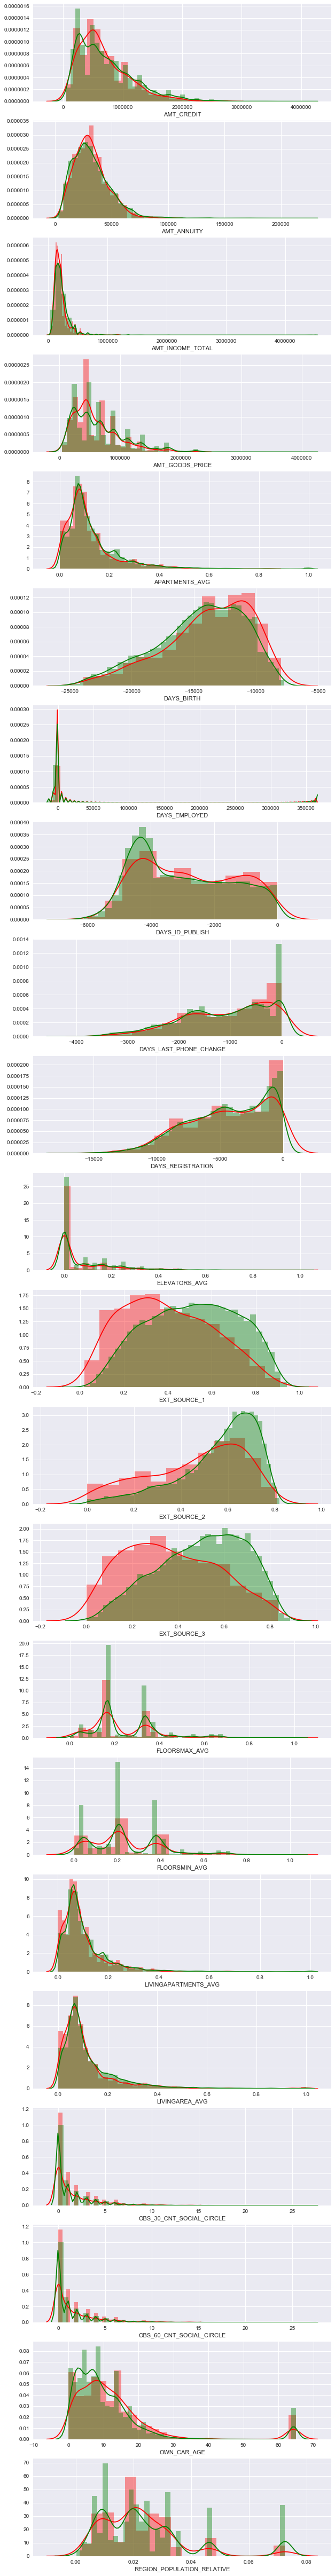

In [218]:
df_app_train_continous_drop=df_app_train_continous.dropna()
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(24, 1)
plt.figure(figsize=(10,24*4))
for i,col in enumerate(df_app_train_continous_drop[df_app_train_continous_drop.iloc[:,2:24].columns]):
    ax5=plt.subplot(gs[i])
    sns.distplot(df_app_train_continous_drop[col][df_app_train_continous_drop.TARGET == 1], color='r')
    sns.distplot(df_app_train_continous_drop[col][df_app_train_continous_drop.TARGET == 0], color='g')
    #ax5.set_xlabel('')
    #ax5.set_title('feature: ' + str(col))
plt.show()

In [227]:
df_app_train_selected_features = pd.merge(df_app_train_cat,df_app_train_continous,on='SK_ID_CURR')

In [228]:
df_app_train_selected_features.drop('TARGET_x',axis=1,inplace=True)
df_app_train_selected_features.rename(index=str, columns={"TARGET_y": "TARGET"},inplace = True)

In [229]:
df_app_train_selected_features.shape

(307511, 58)

In [230]:
df_app_train_selected_features.columns

Index([u'SK_ID_CURR', u'NAME_CONTRACT_TYPE', u'CODE_GENDER', u'FLAG_OWN_CAR',
       u'FLAG_OWN_REALTY', u'NAME_TYPE_SUITE', u'NAME_INCOME_TYPE',
       u'NAME_EDUCATION_TYPE', u'NAME_FAMILY_STATUS', u'NAME_HOUSING_TYPE',
       u'OCCUPATION_TYPE', u'CNT_CHILDREN', u'CNT_FAM_MEMBERS',
       u'WEEKDAY_APPR_PROCESS_START', u'ORGANIZATION_TYPE',
       u'DEF_30_CNT_SOCIAL_CIRCLE', u'DEF_60_CNT_SOCIAL_CIRCLE',
       u'FLAG_CONT_MOBILE', u'FLAG_EMAIL', u'FLAG_EMP_PHONE', u'FLAG_MOBIL',
       u'FLAG_WORK_PHONE', u'LIVE_CITY_NOT_WORK_CITY',
       u'LIVE_REGION_NOT_WORK_REGION', u'REG_CITY_NOT_LIVE_CITY',
       u'REG_CITY_NOT_WORK_CITY', u'REG_REGION_NOT_LIVE_REGION',
       u'REG_REGION_NOT_WORK_REGION', u'REGION_RATING_CLIENT',
       u'REGION_RATING_CLIENT_W_CITY', u'FLAG_DOCUMENT_2', u'FLAG_DOCUMENT_21',
       u'FLAG_DOCUMENT_3', u'FLAG_DOCUMENT_6', u'TARGET', u'AMT_CREDIT',
       u'AMT_ANNUITY', u'AMT_INCOME_TOTAL', u'AMT_GOODS_PRICE',
       u'APARTMENTS_AVG', u'DAYS_BIRTH', u'DAY

In [231]:
df_app_train_selected_features.isnull().sum().sort_values(ascending=False)

LIVINGAPARTMENTS_AVG           210199
FLOORSMIN_AVG                  208642
OWN_CAR_AGE                    202929
EXT_SOURCE_1                   173378
ELEVATORS_AVG                  163891
APARTMENTS_AVG                 156061
LIVINGAREA_AVG                 154350
FLOORSMAX_AVG                  153020
TOTALAREA_MODE                 148431
OCCUPATION_TYPE                 96391
EXT_SOURCE_3                    60965
NAME_TYPE_SUITE                  1292
DEF_60_CNT_SOCIAL_CIRCLE         1021
DEF_30_CNT_SOCIAL_CIRCLE         1021
OBS_60_CNT_SOCIAL_CIRCLE         1021
OBS_30_CNT_SOCIAL_CIRCLE         1021
EXT_SOURCE_2                      660
AMT_GOODS_PRICE                   278
AMT_ANNUITY                        12
CNT_FAM_MEMBERS                     2
DAYS_LAST_PHONE_CHANGE              1
FLAG_CONT_MOBILE                    0
FLAG_EMAIL                          0
ORGANIZATION_TYPE                   0
WEEKDAY_APPR_PROCESS_START          0
CNT_CHILDREN                        0
NAME_INCOME_

In [232]:
#Creating a function to pre-process data. Filling missing values, dropping columns and converting 
#catergical values to numeric

def preprocess(df,dropcol):
    df['FLOORSMIN_AVG'] = df['FLOORSMIN_AVG'].fillna(df['FLOORSMIN_AVG'].mean())
    df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].fillna(df['OWN_CAR_AGE'].mean())
    df['EXT_SOURCE_3'] = df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_1'])
    df['EXT_SOURCE_3'] = df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean())
    df['ELEVATORS_AVG'] = df['ELEVATORS_AVG'].fillna(0)
    df['APARTMENTS_AVG'] = df['APARTMENTS_AVG'].fillna(df['APARTMENTS_AVG'].mean())
    df['LIVINGAREA_AVG'] = df['LIVINGAREA_AVG'].fillna(df['LIVINGAREA_AVG'].mean())
    df['FLOORSMAX_AVG'] = df['FLOORSMAX_AVG'].fillna(df['FLOORSMAX_AVG'].mean())
    df['TOTALAREA_MODE'] = df['TOTALAREA_MODE'].fillna(df['TOTALAREA_MODE'].mean())
    df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].fillna('Unaccompanied')
    df['OBS_30_CNT_SOCIAL_CIRCLE'] = df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0)
    df['OBS_60_CNT_SOCIAL_CIRCLE']= df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0)
    df['DEF_60_CNT_SOCIAL_CIRCLE'] = df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0)
    df['DEF_30_CNT_SOCIAL_CIRCLE'] = df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0)
    df['EXT_SOURCE_2'] = df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean())
    df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mean())
    df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].fillna(0)
    #df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('MISSING')
    df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean())
    df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].mean())
    
    df=df.drop(dropcol, axis=1)
    
    df['CODE_GENDER'] = df.CODE_GENDER.map({'M':0, 'F':1,'XNA':2}) 
    df['FLAG_OWN_CAR'] = df.FLAG_OWN_CAR.map({'N':0, 'Y':1})
    df['FLAG_OWN_REALTY'] = df.FLAG_OWN_REALTY.map({'N':0, 'Y':1})
    df = pd.get_dummies(df,columns=['NAME_CONTRACT_TYPE','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE',
                                                'NAME_HOUSING_TYPE',
                                                'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'])
    return df

In [233]:
dropcol = ['SK_ID_CURR','LIVINGAPARTMENTS_AVG', 'EXT_SOURCE_1', 'OCCUPATION_TYPE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS']
df_train =preprocess(df_app_train_selected_features,dropcol)
print "Number of features of each data type \n" 
print df_train.dtypes.value_counts()
print "Number of unique vlues for object data type \n" 
df_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Number of features of each data type 

uint8      85
int64      25
float64    21
dtype: int64
Number of unique vlues for object data type 



Series([], dtype: float64)

In [234]:
df_train.dtypes.value_counts()

uint8      85
int64      25
float64    21
dtype: int64

In [235]:
df_train.isnull().sum().sort_values(ascending=False)

ORGANIZATION_TYPE_XNA                                0
DAYS_ID_PUBLISH                                      0
DAYS_REGISTRATION                                    0
ELEVATORS_AVG                                        0
EXT_SOURCE_2                                         0
EXT_SOURCE_3                                         0
FLOORSMAX_AVG                                        0
FLOORSMIN_AVG                                        0
LIVINGAREA_AVG                                       0
OBS_30_CNT_SOCIAL_CIRCLE                             0
OBS_60_CNT_SOCIAL_CIRCLE                             0
OWN_CAR_AGE                                          0
REGION_POPULATION_RELATIVE                           0
TOTALAREA_MODE                                       0
NAME_CONTRACT_TYPE_Cash loans                        0
NAME_CONTRACT_TYPE_Revolving loans                   0
NAME_TYPE_SUITE_Children                             0
NAME_TYPE_SUITE_Family                               0
NAME_TYPE_

In [236]:
df_model=df_train
#df_model=df_train.dropna(axis=0)

In [237]:
#Calculate probabilities using Logistic Regression model
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
y=df_model['TARGET'].values
X=df_model.drop(['TARGET'],axis=1).values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)

In [238]:
Lreg = LogisticRegression(C = 0.01, penalty = 'l1')
Lreg.fit(X_train,y_train)
y_pred=Lreg.predict(X_test)
y_pred_prob=Lreg.predict_proba(X_test)
train_pred=Lreg.predict(X_train)
print ('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred))

('train-set confusion matrix:\n', array([[197768,     78],
       [ 17337,     74]]))


In [239]:
print ('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred) )
print ("recall score: ", recall_score(y_test,y_pred))
print ("precision score: ", precision_score(y_test,y_pred))
print ("f1 score: ", f1_score(y_test,y_pred))
print ("accuracy score: ", accuracy_score(y_test,y_pred))
print ("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

('test-set confusion matrix:\n', array([[84813,    27],
       [ 7386,    28]]))
('recall score: ', 0.0037766387914755866)
('precision score: ', 0.50909090909090904)
('f1 score: ', 0.007497656982193064)
('accuracy score: ', 0.91964576061742576)
ROC AUC: 0.739161263519


In [240]:
#LightGMB
import lightgbm as lgb
from lightgbm import LGBMClassifier
clf = LGBMClassifier(
            nthread=4,
            n_estimators=1000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )

In [241]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred_prob=clf.predict_proba(X_test)
train_pred=clf.predict(X_train)
print ('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred))

('train-set confusion matrix:\n', array([[197622,    224],
       [ 16870,    541]]))


In [242]:
print ('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred) )
print ("recall score: ", recall_score(y_test,y_pred))
print ("precision score: ", precision_score(y_test,y_pred))
print ("f1 score: ", f1_score(y_test,y_pred))
print ("accuracy score: ", accuracy_score(y_test,y_pred))
print ("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

('test-set confusion matrix:\n', array([[84699,   141],
       [ 7255,   159]]))
('recall score: ', 0.021445913137307798)
('precision score: ', 0.53000000000000003)
('f1 score: ', 0.041223749027741771)
('accuracy score: ', 0.91983003447005007)
ROC AUC: 0.756174662613


In [243]:
y_pred_prob.shape

(92254L, 2L)

In [244]:
y_pred_prob[:,1]

array([ 0.01126566,  0.04914313,  0.02469461, ...,  0.00805942,
        0.04328538,  0.04600397])

In [245]:
np.array_equal(y_test, y_pred)

False

In [201]:
df_app_train_selected_features[['EXT_SOURCE_1', 'EXT_SOURCE_3','EXT_SOURCE_2']]

,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2
0,0.083037,0.139376,0.262949
1,0.311267,0.311267,0.622246
2,NaN,0.729567,0.555912
3,NaN,0.507633,0.650442
4,NaN,0.507633,0.322738
5,NaN,0.621226,0.354225
6,0.774761,0.492060,0.724000
7,NaN,0.540654,0.714279
8,0.587334,0.751724,0.205747
9,NaN,0.507633,0.746644


In [246]:
df_app_test1= df_app_test[['NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 
                                 'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                                      'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_CONT_MOBILE','FLAG_EMAIL','FLAG_EMP_PHONE',
                                 'FLAG_MOBIL','FLAG_WORK_PHONE', 'LIVE_CITY_NOT_WORK_CITY','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
                                 'REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                                 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2',
                                 'FLAG_DOCUMENT_21','FLAG_DOCUMENT_3','FLAG_DOCUMENT_6','AMT_CREDIT', 'AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE',
                                       'APARTMENTS_AVG', 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
                                       'DAYS_REGISTRATION', 'ELEVATORS_AVG','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                                     'FLOORSMAX_AVG','FLOORSMIN_AVG','LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG','OBS_30_CNT_SOCIAL_CIRCLE'
                                     ,'OBS_60_CNT_SOCIAL_CIRCLE','OWN_CAR_AGE','REGION_POPULATION_RELATIVE', 'TOTALAREA_MODE']]

In [247]:
dropcol = ['LIVINGAPARTMENTS_AVG', 'EXT_SOURCE_1','OCCUPATION_TYPE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS']
df_test =preprocess(df_app_test1,dropcol)
print "Number of features of each data type \n" 
print df_test.dtypes.value_counts()
print "Number of unique vlues for object data type \n" 
print df_test.select_dtypes('object').apply(pd.Series.nunique, axis=0)
df_train.isnull().sum().sort_values(ascending=False)

C:\Users\ye543288\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ye543288\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ye543288\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Number of features of each data type 

uint8      85
int64      24
float64    21
dtype: int64
Number of unique vlues for object data type 

Series([], dtype: float64)


ORGANIZATION_TYPE_XNA                                0
DAYS_ID_PUBLISH                                      0
DAYS_REGISTRATION                                    0
ELEVATORS_AVG                                        0
EXT_SOURCE_2                                         0
EXT_SOURCE_3                                         0
FLOORSMAX_AVG                                        0
FLOORSMIN_AVG                                        0
LIVINGAREA_AVG                                       0
OBS_30_CNT_SOCIAL_CIRCLE                             0
OBS_60_CNT_SOCIAL_CIRCLE                             0
OWN_CAR_AGE                                          0
REGION_POPULATION_RELATIVE                           0
TOTALAREA_MODE                                       0
NAME_CONTRACT_TYPE_Cash loans                        0
NAME_CONTRACT_TYPE_Revolving loans                   0
NAME_TYPE_SUITE_Children                             0
NAME_TYPE_SUITE_Family                               0
NAME_TYPE_

In [248]:
#Predicting probabilities for Kaggle test Dataset
pred_prob=Lreg.predict_proba(df_test)

In [253]:
print pred_prob[:,1]

[ 0.06519013  0.18904257  0.02725478 ...,  0.0797835   0.0678381
  0.13106778]


In [130]:
print df_train.columns

Index([u'CODE_GENDER', u'FLAG_OWN_CAR', u'FLAG_OWN_REALTY', u'CNT_CHILDREN',
       u'CNT_FAM_MEMBERS', u'DEF_30_CNT_SOCIAL_CIRCLE',
       u'DEF_60_CNT_SOCIAL_CIRCLE', u'FLAG_CONT_MOBILE', u'FLAG_EMAIL',
       u'FLAG_EMP_PHONE',
       ...
       u'OCCUPATION_TYPE_Low-skill Laborers', u'OCCUPATION_TYPE_MISSING',
       u'OCCUPATION_TYPE_Managers', u'OCCUPATION_TYPE_Medicine staff',
       u'OCCUPATION_TYPE_Private service staff',
       u'OCCUPATION_TYPE_Realty agents', u'OCCUPATION_TYPE_Sales staff',
       u'OCCUPATION_TYPE_Secretaries', u'OCCUPATION_TYPE_Security staff',
       u'OCCUPATION_TYPE_Waiters/barmen staff'],
      dtype='object', length=164)


In [256]:
final_test = df_app_test[['SK_ID_CURR']]
final_test['TARGET'] = pred_prob[:,1]

C:\Users\ye543288\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [257]:
final_test

,SK_ID_CURR,TARGET
0,100001,0.065190
1,100005,0.189043
2,100013,0.027255
3,100028,0.030236
4,100038,0.172604
5,100042,0.047278
6,100057,0.038332
7,100065,0.098736
8,100066,0.026352
9,100067,0.085672


In [258]:
final_test.to_csv('name3.csv', encoding='utf-8')